In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import datetime
import yfinance as yf

In [2]:
start = '2005-01-01'
end = '2021-12-31'

start_date = datetime.strptime(start, '%Y-%m-%d')
end_date = datetime.strptime(end, '%Y-%m-%d')


# yfinance module to get the stock data
data = yf.download('AMZN', start=start_date, end=end_date)


# Converting data to Pandas DataFrame
df = pd.DataFrame(data)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,2.2475,2.2720,2.2105,2.2260,2.2260,208930000
2005-01-04,2.1335,2.1630,2.0750,2.1070,2.1070,388370000
2005-01-05,2.0785,2.1380,2.0780,2.0885,2.0885,167084000
2005-01-06,2.0905,2.1125,2.0450,2.0525,2.0525,174018000
2005-01-07,2.0690,2.1345,2.0580,2.1160,2.1160,196732000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000
2021-12-30,169.699997,170.888000,168.524002,168.644501,168.644501,37584000


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,2.2475,2.2720,2.2105,2.2260,2.2260,208930000
1,2005-01-04,2.1335,2.1630,2.0750,2.1070,2.1070,388370000
2,2005-01-05,2.0785,2.1380,2.0780,2.0885,2.0885,167084000
3,2005-01-06,2.0905,2.1125,2.0450,2.0525,2.0525,174018000
4,2005-01-07,2.0690,2.1345,2.0580,2.1160,2.1160,196732000


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2.2475,2.2720,2.2105,2.2260,208930000
1,2.1335,2.1630,2.0750,2.1070,388370000
2,2.0785,2.1380,2.0780,2.0885,167084000
3,2.0905,2.1125,2.0450,2.0525,174018000
4,2.0690,2.1345,2.0580,2.1160,196732000


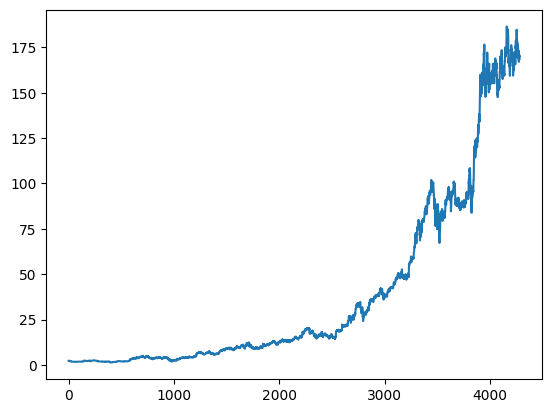

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,2.247500,2.272000,2.210500,2.226000,208930000
1,2.133500,2.163000,2.075000,2.107000,388370000
2,2.078500,2.138000,2.078000,2.088500,167084000
3,2.090500,2.112500,2.045000,2.052500,174018000
4,2.069000,2.134500,2.058000,2.116000,196732000
...,...,...,...,...,...
4274,170.427994,171.975006,170.149994,171.068497,36788000
4275,171.037003,172.942993,169.215500,169.669495,58688000
4276,170.182495,172.175995,169.135498,170.660995,54638000
4277,170.839996,171.212006,168.600494,169.201004,35754000


In [8]:
ma50 = df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    172.844941
4275    172.938471
4276    172.942671
4277    172.879951
4278    172.808690
Name: Close, Length: 4279, dtype: float64

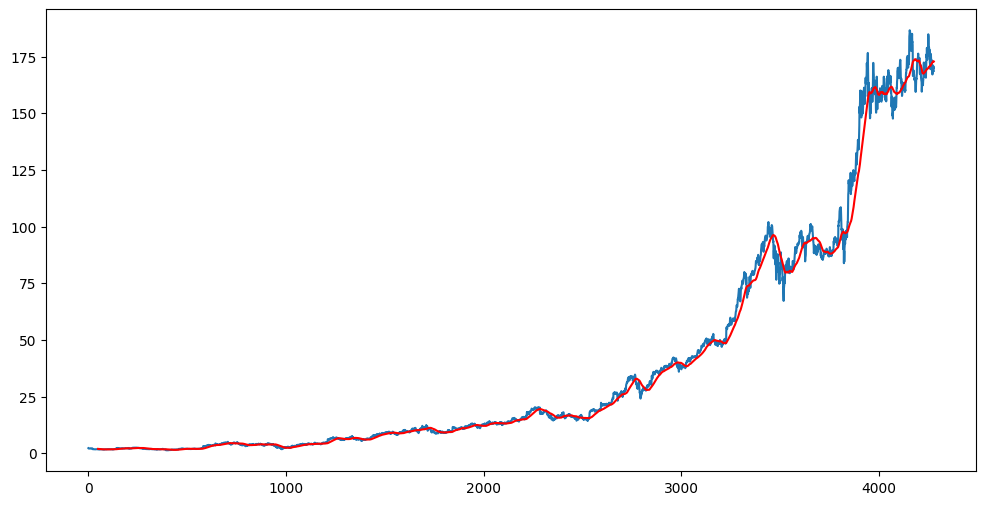

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    170.163631
4275    170.182966
4276    170.201581
4277    170.221121
4278    170.236631
Name: Close, Length: 4279, dtype: float64

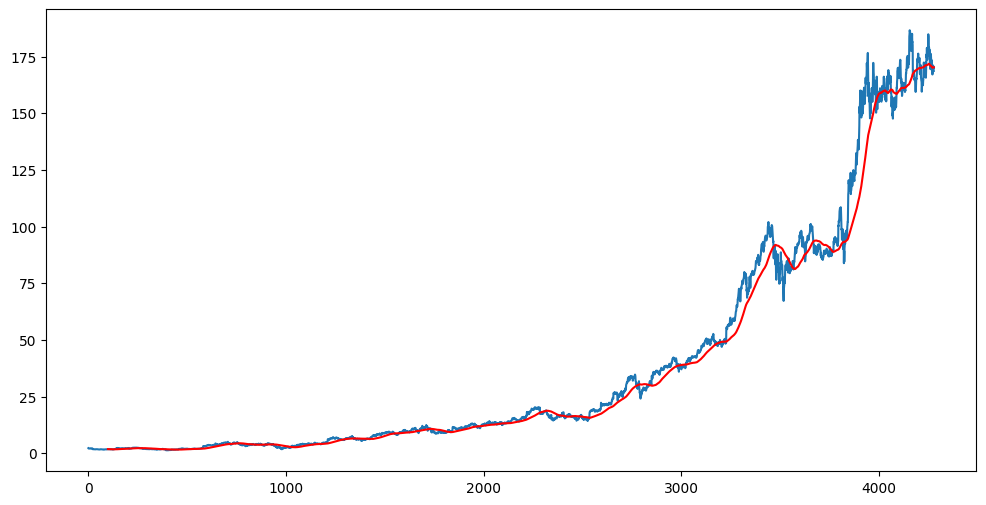

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    168.883118
4275    168.959093
4276    169.041978
4277    169.115018
4278    169.174308
Name: Close, Length: 4279, dtype: float64

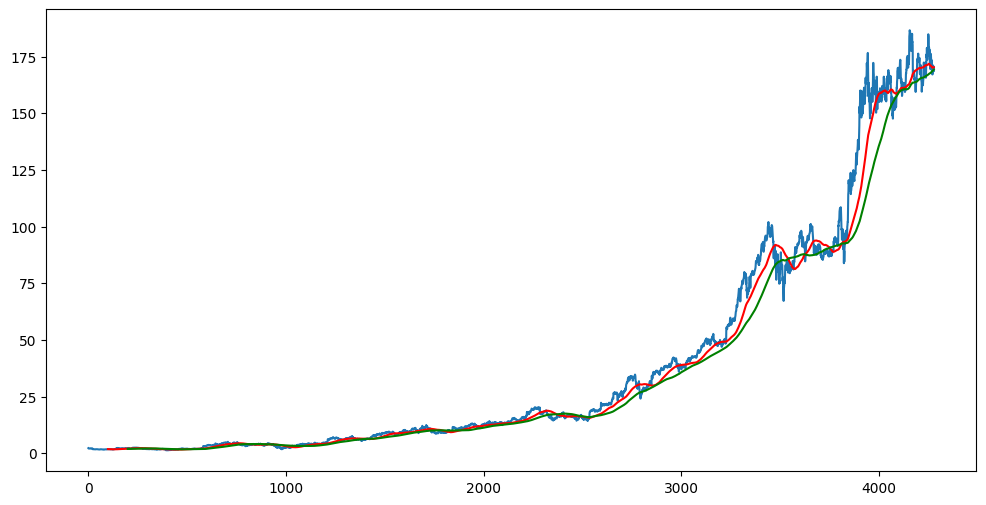

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(4279, 5)

In [15]:
# Splitting the Data into Two Parts Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2995, 1)
(1284, 1)


In [16]:
data_training.head()

,Close
0,2.2260
1,2.1070
2,2.0885
3,2.0525
4,2.1160


In [17]:
data_testing.head()

,Close
2995,39.006001
2996,39.018501
2997,38.338501
2998,38.125999
2999,37.528500


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02254702],
       [0.01963852],
       [0.01918635],
       ...,
       [0.89710251],
       [0.92134821],
       [0.92786176]])

In [20]:
data_training_array.shape

(2995, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2895, 100, 1)

In [23]:
# Machine Learning Model Creation

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
91/91 [==============================] - 25s 224ms/step - loss: 0.0178
Epoch 2/50
91/91 [==============================] - 19s 209ms/step - loss: 0.0043
Epoch 3/50
91/91 [==============================] - 19s 209ms/step - loss: 0.0044
Epoch 4/50
91/91 [==============================] - 19s 208ms/step - loss: 0.0031
Epoch 5/50
91/91 [==============================] - 19s 209ms/step - loss: 0.0033
Epoch 6/50
91/91 [==============================] - 19s 211ms/step - loss: 0.0031
Epoch 7/50
91/91 [==============================] - 19s 211ms/step - loss: 0.0028
Epoch 8/50
91/91 [==============================] - 19s 213ms/step - loss: 0.0030
Epoch 9/50
91/91 [==============================] - 19s 212ms/step - loss: 0.0024
Epoch 10/50
91/91 [==============================] - 20s 216ms/step - loss: 0.0027
Epoch 11/50
91/91 [==============================] - 14s 150ms/step - loss: 0.0024
Epoch 12/50
91/91 [==============================] - 139s 2s/step - loss: 0.0024
Epoch 13/50
91/

In [27]:
model.save('keras_model.h5')

c:\Users\Manish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
data_testing.head()

,Close
2995,39.006001
2996,39.018501
2997,38.338501
2998,38.125999
2999,37.528500


In [29]:
data_training.tail(100)

,Close
2895,36.404999
2896,36.880501
2897,36.828499
2898,37.290501
2899,37.688999
...,...
2990,37.324501
2991,37.820000
2992,38.007999
2993,39.000000


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days._append(data_testing, ignore_index = True)

In [32]:
final_df.head()

,Close
0,36.404999
1,36.880501
2,36.828499
3,37.290501
4,37.688999


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00299767],
       [0.0061547 ],
       [0.00580944],
       ...,
       [0.89437115],
       [0.88467775],
       [0.88098292]])

In [34]:
input_data.shape

(1384, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1284, 100, 1)
(1284,)


In [37]:
# Making Stock Price Prediction

y_predicted = model.predict(x_test)

41/41 [==============================] - 3s 59ms/step


In [38]:
y_predicted.shape

(1284, 1)

In [39]:
y_test

array([0.02026665, 0.02034965, 0.01583488, ..., 0.89437115, 0.88467775,
       0.88098292])

In [40]:
y_predicted

array([[0.06901716],
       [0.06825276],
       [0.06766383],
       ...,
       [0.8219987 ],
       [0.8217205 ],
       [0.8216206 ]], dtype=float32)

In [41]:
scaler.scale_

array([0.00663936])

In [42]:
scale_factor = 1/0.00218431
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

In [43]:
y_train = y_train*scale_factor

In [44]:
y_test = y_test.reshape(1284,1)
y_test.shape

(1284, 1)

In [45]:
price_df1 =pd.DataFrame(data = y_train)
price_df2 = np.concatenate((y_test,y_predicted),axis = 1)
price_df2 = pd.DataFrame(data = price_df2,columns=['Y Test','Y Predicted'])
price_df = pd.concat([price_df1,price_df2])
price_df = price_df.rename(columns ={0:"Y Training"})
price_df =price_df.reset_index()
price_df.head()

,index,Y Training,Y Test,Y Predicted
0,0,5.247849,NaN,NaN
1,1,5.275822,NaN,NaN
2,2,5.281417,NaN,NaN
3,3,5.835295,NaN,NaN
4,4,5.784942,NaN,NaN


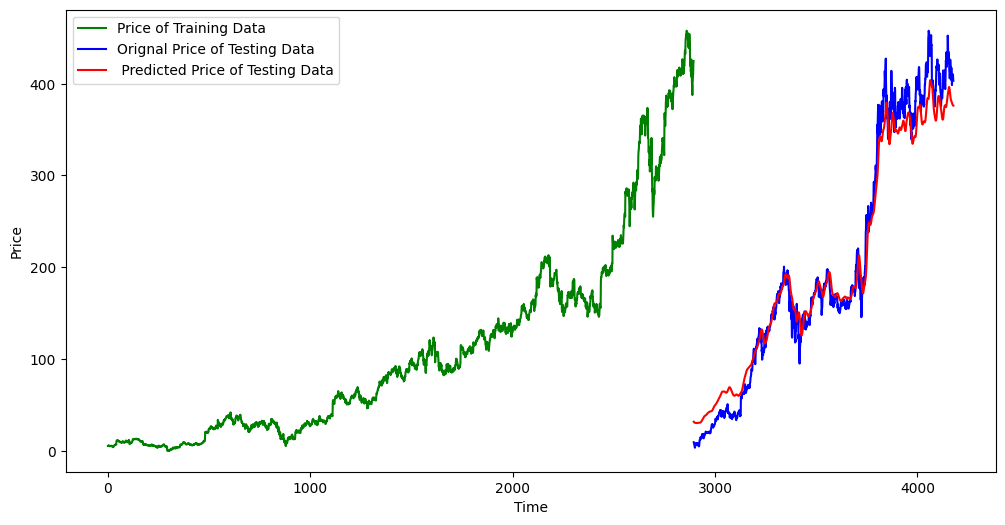

In [46]:
plt.figure(figsize = (12,6))
plt.plot(price_df.index, price_df['Y Training'],'g',label = 'Price of Training Data')
plt.plot(price_df.index, price_df['Y Test'], 'b', label = 'Orignal Price of Testing Data')
plt.plot(price_df.index, price_df['Y Predicted'], 'r', label = ' Predicted Price of Testing Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

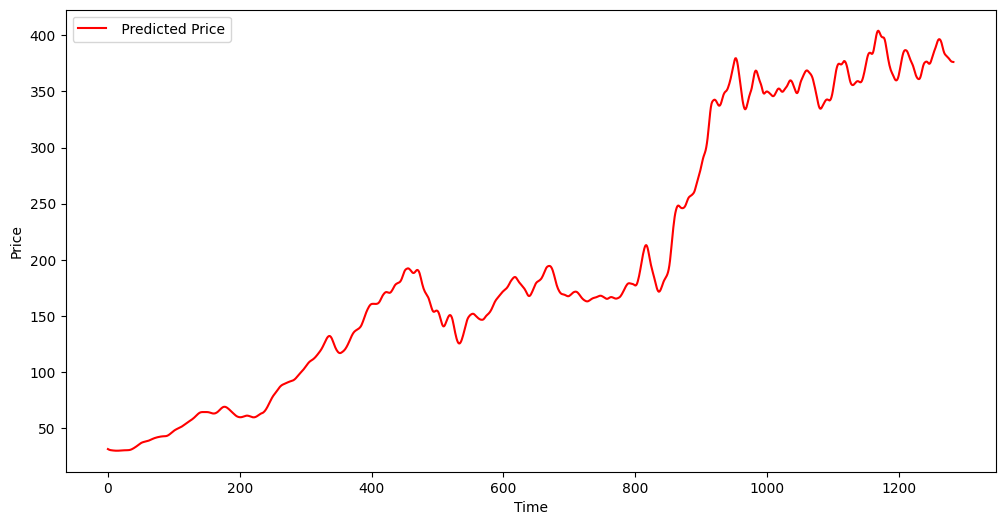

In [47]:
plt.figure(figsize = (12,6))
plt.plot(y_predicted, 'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

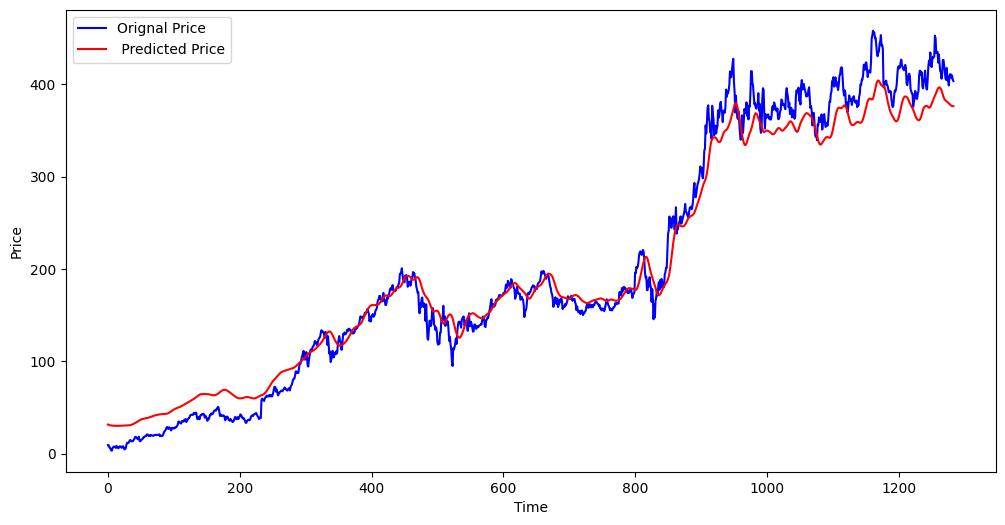

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_predicted)
rmse = sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 489.4367725021192
Root Mean Squared Error: 22.12321795087955
